#Section 1: Questions to Answer

1. Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?

  Predicting a disease can help the patients and doctors to cure it. By the doctor's point of view predicting disease acuurately will take less time for the patients to fall more ill or die and it will lower the burden on patients on medical treatment. It will take less time to diagnose and prognose the disease. Predicting a disease can also lower the burden on hospital to over crowd; Less time on diagnosis, more time on prognosis can leads less expenditure on treatment, less burden on hospital.

  The proposal of predicting a disease is all about to reduce the burden on doctors to cure patients. This will help the medical personnel to make less effort and give more outcome.

2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden.

  It takes less time to diagnose the disease even giving more burden to our doctors. Just fill the data and the model gives the result that the patient is covid positive or negative.
  The doctors are over worked during the corona outbreak and it is very difficult to look every patient if the disease is highly infectious. Our doctors have the high risk of death than the patients.
  The model definately help in the medical field to reduce the burden.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

  The method is very simple just fill the data with symptoms the patient facing and the model predict the patients is corona positive or negative. For any other disease, the diffrent models can be build.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CAP 2 Dataset/corona_tested_006.csv')

<ipython-input-2-cb633e60a66d>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/CAP 2 Dataset/corona_tested_006.csv')


In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
df.shape

(278848, 11)

In [ ]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
df['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [ ]:
df['Fever'].value_counts()

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [ ]:
df['Sore_throat'].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [ ]:
df['Shortness_of_breath'].value_counts()

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

In [ ]:
df['Headache'].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [ ]:
df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [ ]:
df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
df['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [ ]:
df['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

As we can see that there is no null values but there is "None" value in columns 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache' in place of boolean value. The "None" numbers are high in columns 'Cough_symptoms', 'Fever'. We can not loose the data. So we assume that "None" is 'FALSE' and we change the values with 'False'.

In 'Age_60_above' and 'Sex' columns we change 'None' value with mode value respectively.

In [ ]:
data=df.copy()          #Make copy of original data

In [ ]:
data['Cough_symptoms'].replace('None',False, regex=True, inplace=True)
data['Cough_symptoms'].replace('TRUE',True, regex=True, inplace=True)
data['Cough_symptoms'].replace('FALSE',False, regex=True, inplace=True)
data['Cough_symptoms'].value_counts()

False    236620
True      42228
Name: Cough_symptoms, dtype: int64

In [ ]:
data['Fever'].replace('None',False, regex=True, inplace=True)
data['Fever'].replace('TRUE',True, regex=True, inplace=True)
data['Fever'].replace('FALSE',False, regex=True, inplace=True)
data['Fever'].value_counts()

False    257096
True      21752
Name: Fever, dtype: int64

In [ ]:
data['Sore_throat'].replace('None',False, regex=True, inplace=True)
data['Sore_throat'].replace('TRUE',True, regex=True, inplace=True)
data['Sore_throat'].replace('FALSE',False, regex=True, inplace=True)
data['Sore_throat'].value_counts()

False    276922
True       1926
Name: Sore_throat, dtype: int64

In [ ]:
data['Shortness_of_breath'].replace('None',False, regex=True, inplace=True)
data['Shortness_of_breath'].replace('TRUE',True, regex=True, inplace=True)
data['Shortness_of_breath'].replace('FALSE',False, regex=True, inplace=True)
data['Shortness_of_breath'].value_counts()

False    277271
True       1577
Name: Shortness_of_breath, dtype: int64

In [ ]:
data['Headache'].replace('None',False, regex=True, inplace=True)
data['Headache'].replace('TRUE',True, regex=True, inplace=True)
data['Headache'].replace('FALSE',False, regex=True, inplace=True)
data['Headache'].value_counts()

False    276434
True       2414
Name: Headache, dtype: int64

In [ ]:
data['Age_60_above'].replace('None','No', regex=True, inplace=True)
data['Age_60_above'].value_counts()

No     253023
Yes     25825
Name: Age_60_above, dtype: int64

In [ ]:
data['Sex'].replace('None','female', regex=True, inplace=True)
data['Sex'].value_counts()

female    149721
male      129127
Name: Sex, dtype: int64

In [ ]:
data['Test_date'] = pd.to_datetime(data['Test_date'])

<ipython-input-11-099794a8abe7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Test_date'] = pd.to_datetime(data['Test_date'])


In [ ]:
data['Year'] = data['Test_date'].dt.year
data['Month'] = data['Test_date'].dt.month
data['Day'] = data['Test_date'].dt.day

In [ ]:
dataset=data.copy()

In [ ]:
data.to_csv(r'corona_tested_006_SQLFILE.csv', index=False)

#Section 3: Data analysis approach

1. What approach are you going to take in order to prove or disprove your hypothesis?

**HYPOTHESIS**

The corona_tested datset table contains 11 columns(features) and 278448 rows. The features have nominal categorical values.

**My hypothesis is on whether the gender has any any relationship with corona report (positive or negative).**

H0: There is no association in the gender and the corona test result.

H1: There is association in the gender and the corona test result.

In [ ]:
dataset_table=pd.crosstab(dataset['Sex'],dataset['Corona'])
dataset_table

Corona,negative,other,positive
Sex,,,
female,140376,2135,7210
male,119851,1757,7519


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
print(val)

Chi2ContingencyResult(statistic=141.89987843019287, pvalue=1.5375629573328895e-31, dof=2, expected_freq=array([[139722.88367498,   2089.71960351,   7908.39672151],
       [120504.11632502,   1802.28039649,   6820.60327849]]))


In [ ]:
p_value=val[1]
print(p_value)
if p_value<0.05:
  print("There is no association in the gender and the corona test result. So we accept null hypothesis.")
else:
  print("There is association in the gender and the corona test result. So we reject null hypothesis.")

1.5375629573328895e-31
There is no association in the gender and the corona test result. So we accept null hypothesis.


2. What feature engineering techniques will be relevant to your project?

  - Replace the values of column 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', from "None" to "False and replace "TRUE" & "FALSE" test to boolean. In 'Age_60_above' column replace "None" to "No". In 'Sex' column replace "None" to "female".
  - Change 'Test_Date" column datatype OBJECT to DateTime and split into 'Year", 'Month' & 'Day' column.
  - using Label_Encoder in data

3. Please justify your data analysis approach.

  The data has some incorrect entries. So I need to replace with mode values. The CHI-Square test whether the gender has association with the corona test result(positive or negative). My hypothesis said that it has no relationship.

4. Identify important patterns in your data using the EDA approach to justify your findings.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  bool          
 3   Fever                278848 non-null  bool          
 4   Sore_throat          278848 non-null  bool          
 5   Shortness_of_breath  278848 non-null  bool          
 6   Headache             278848 non-null  bool          
 7   Corona               278848 non-null  object        
 8   Age_60_above         278848 non-null  object        
 9   Sex                  278848 non-null  object        
 10  Known_contact        278848 non-null  object        
 11  Year                 278848 non-null  int64         
 12  Month                278848 non-null  int64         
 13  Day           

In [ ]:
data.shape

(278848, 14)

In [ ]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Year,Month,Day
0,1,2020-11-03,True,False,True,False,False,negative,No,female,Abroad,2020,11,3
1,2,2020-11-03,False,True,False,False,False,positive,No,female,Abroad,2020,11,3
2,3,2020-11-03,False,True,False,False,False,positive,No,female,Abroad,2020,11,3
3,4,2020-11-03,True,False,False,False,False,negative,No,female,Abroad,2020,11,3
4,5,2020-11-03,True,False,False,False,False,negative,No,female,Contact with confirmed,2020,11,3


In [ ]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
Year                   0
Month                  0
Day                    0
dtype: int64

In [ ]:
le=LabelEncoder()

In [ ]:
data['Cough_symptoms']=le.fit_transform(data['Cough_symptoms'])
data['Fever']=le.fit_transform(data['Fever'])
data['Sore_throat']=le.fit_transform(data['Sore_throat'])
data['Shortness_of_breath']=le.fit_transform(data['Shortness_of_breath'])
data['Headache']=le.fit_transform(data['Headache'])
data['Corona']=le.fit_transform(data['Corona'])
data['Age_60_above']=le.fit_transform(data['Age_60_above'])
data['Sex']=le.fit_transform(data['Sex'])
data['Known_contact']=le.fit_transform(data['Known_contact'])


In [ ]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Year,Month,Day
0,1,2020-11-03,1,0,1,0,0,0,0,0,0,2020,11,3
1,2,2020-11-03,0,1,0,0,0,2,0,0,0,2020,11,3
2,3,2020-11-03,0,1,0,0,0,2,0,0,0,2020,11,3
3,4,2020-11-03,1,0,0,0,0,0,0,0,0,2020,11,3
4,5,2020-11-03,1,0,0,0,0,0,0,0,1,2020,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,2,0,1,2,2020,4,30
278844,278845,2020-04-30,0,0,0,0,0,0,0,0,2,2020,4,30
278845,278846,2020-04-30,0,0,0,0,0,0,0,1,2,2020,4,30
278846,278847,2020-04-30,0,0,0,0,0,0,0,1,2,2020,4,30


In [ ]:
data.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact', 'Year', 'Month', 'Day'],
      dtype='object')

#Section 4: Machine learning approach

1.What method will you use for machine learning based predictions of COVID19?

  - Logistic Regression
  - Decision Tree
  - Random Forest
  - KNN

2. Please justify the most appropriate model.

  The most suitable model is Random Forest Classifier. It gives maximum accuracy among other three models. Its accuracy is 97.59% and log loss is 0.51

3. Please perform necessary steps required to improve the accuracy of your model.

- Logistic Regression I use C = 0.001, penalty = 'l2'
- Decision Tree I use criterion= 'gini', max_depth = 3, min_samples_leaf = 3, min_samples_split = 8
- Random Forest I use criterion = 'gini', max_depth = 4, n_estimators = 1
- KNN I use metric = 'manhattan', n_neighbors = 15, weights = 'uniform'

In [ ]:
#Segemnt the data into dependent and independent variable

x = data[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact', 'Year', 'Month', 'Day']]
y = data[['Corona']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=False)

**1. Logistic Regression**

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}


In [ ]:
logit_model=LogisticRegression(C = 0.001, penalty = 'l2')
logit_model.fit(x_train,y_train)

In [ ]:
logit_y_pred = logit_model.predict(x_test)
accuracy = accuracy_score(y_test, logit_y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test,logit_y_pred))
print('Classification Report:\n', classification_report(y_test,logit_y_pred))

Accuracy: 96.82%
Confusion Matrix:
 [[53995     0     1]
 [  643     0     0]
 [ 1131     0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     53996
           1       0.00      0.00      0.00       643
           2       0.00      0.00      0.00      1131

    accuracy                           0.97     55770
   macro avg       0.32      0.33      0.33     55770
weighted avg       0.94      0.97      0.95     55770



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Log Loss:  0.4168577449521351


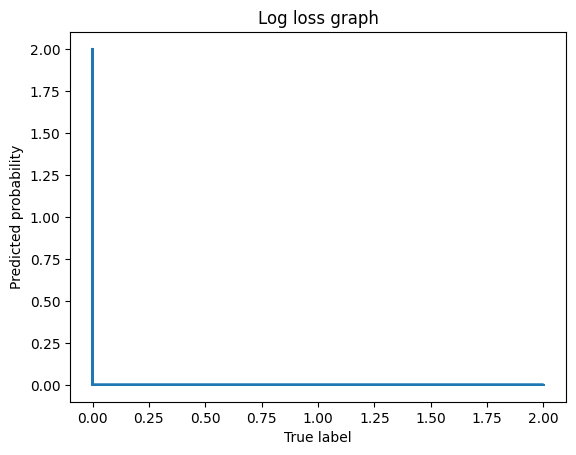

In [ ]:
log_loss_value = log_loss(y_test, logit_y_pred, labels=[0,1])
print('Log Loss: ', log_loss_value)

# Plot the log loss graph
plt.plot(y_test, logit_y_pred)
plt.xlabel('True label')
plt.ylabel('Predicted probability')
plt.title('Log loss graph')
plt.show()

**2. Decision Tree**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=False)

In [ ]:
tree_model = DecisionTreeClassifier(random_state=100)

In [ ]:
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=tree_model,param_grid=params,cv=5, n_jobs=-1, verbose=True, scoring='accuracy')
GS.fit(x_train,y_train)

GS.best_params_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [ ]:
tree_model1 = DecisionTreeClassifier(criterion= 'gini', max_depth = 3, min_samples_leaf = 3, min_samples_split = 8)
tree_model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=8)

In [ ]:
tree_y_pred = tree_model1.predict(x_test)
tree_accuracy = accuracy_score(y_test,tree_y_pred)
print('Decision Tree Accuracy: {:.2f}%'.format(tree_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test,tree_y_pred))
print('Classification Report:\n', classification_report(y_test,tree_y_pred))

Decision Tree Accuracy: 97.61%
Confusion Matrix:
 [[53834     0   162]
 [  635     0     8]
 [  530     0   601]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     53996
           1       0.00      0.00      0.00       643
           2       0.78      0.53      0.63      1131

    accuracy                           0.98     55770
   macro avg       0.59      0.51      0.54     55770
weighted avg       0.96      0.98      0.97     55770



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Log Loss:  0.5370678853569367


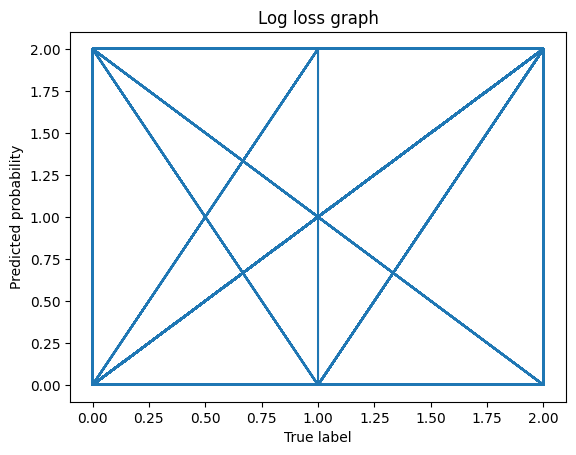

In [ ]:
log_loss_value = log_loss(y_test, tree_y_pred, labels=[0,1])
print('Log Loss: ', log_loss_value)

# Plot the log loss graph
plt.plot(y_test, tree_y_pred)
plt.xlabel('True label')
plt.ylabel('Predicted probability')
plt.title('Log loss graph')
plt.show()

**3. Random Forest**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=False)

In [ ]:
rfc_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1, 100],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }

CV_rfc = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [1, 100]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 1}

In [ ]:
rfc_model = RandomForestClassifier(criterion = 'gini', max_depth = 4, n_estimators = 1)
rfc_model.fit(x_train,y_train)

<ipython-input-39-a3ae10837a79>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(x_train,y_train)


RandomForestClassifier(max_depth=4, n_estimators=1)

In [ ]:
rfc_y_pred = rfc_model.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print('Random Forest Accuracy: {:.2F}%'.format(rfc_accuracy*100))
print('Confusion Matrix:\n', confusion_matrix(y_test,rfc_y_pred))
print('Classification Report:\n', classification_report(y_test,rfc_y_pred))

Random Forest Accuracy: 97.60%
Confusion Matrix:
 [[53831     0   165]
 [  635     0     8]
 [  530     0   601]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     53996
           1       0.00      0.00      0.00       643
           2       0.78      0.53      0.63      1131

    accuracy                           0.98     55770
   macro avg       0.59      0.51      0.54     55770
weighted avg       0.96      0.98      0.97     55770



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Log Loss:  0.5170328619561366


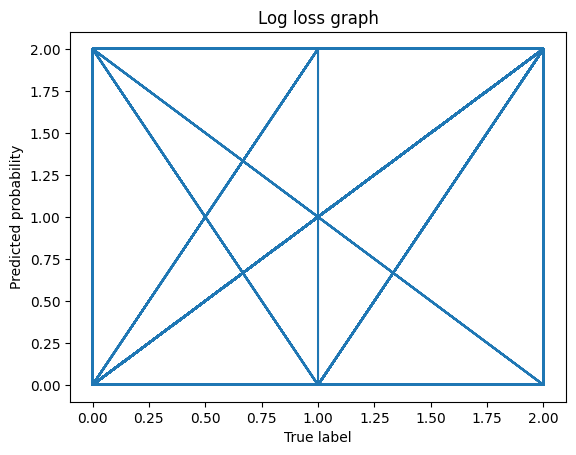

In [ ]:
log_loss_value = log_loss(y_test, rfc_y_pred, labels=[0,1])
print('Log Loss: ', log_loss_value)

# Plot the log loss graph
plt.plot(y_test, rfc_y_pred)
plt.xlabel('True label')
plt.ylabel('Predicted probability')
plt.title('Log loss graph')
plt.show()

**4. KNN(K Nearest Neighbors)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=False)

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs_knn = GridSearchCV(estimator=knn_model, param_grid=grid_params, verbose = 1, cv=3, n_jobs = -1)
gs_knn.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [ ]:
knn_model1 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'uniform')
knn_model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [ ]:
knn_y_pred = knn_model1.predict(x_test)
knn_accuracy = accuracy_score(y_test,knn_y_pred)
print('KNN Accuracy Score: {:.2f}%'.format(knn_accuracy*100))
print('Confusion Matrix:\n', confusion_matrix(y_test,knn_y_pred))
print('Classification Report:\n', classification_report(y_test,knn_y_pred))

KNN Accuracy Score: 96.94%
Confusion Matrix:
 [[53567     0   429]
 [  635     0     8]
 [  637     0   494]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     53996
           1       0.00      0.00      0.00       643
           2       0.53      0.44      0.48      1131

    accuracy                           0.97     55770
   macro avg       0.50      0.48      0.49     55770
weighted avg       0.96      0.97      0.96     55770



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Log Loss:  0.6876537064016613


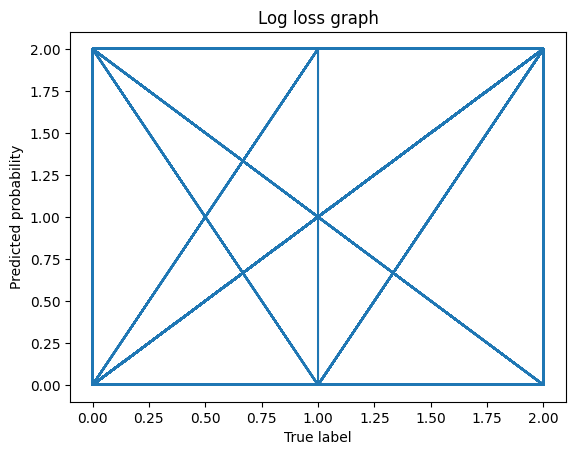

In [ ]:
log_loss_value = log_loss(y_test, knn_y_pred, labels=[0,1])
print('Log Loss: ', log_loss_value)

# Plot the log loss graph
plt.plot(y_test, knn_y_pred)
plt.xlabel('True label')
plt.ylabel('Predicted probability')
plt.title('Log loss graph')
plt.show()